# **STARTUP SUCCESS PREDICTION**

### Importing Library

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/content/startup data.csv'):
   for filename in filenames:
        print(os.path.join(dirname, filename))

In [8]:
from warnings import simplefilter
simplefilter

<function warnings.simplefilter(action, category=<class 'Warning'>, lineno=0, append=False)>

### Importing Dataset

In [9]:
startup = pd.read_csv("/content/startup data.csv")
startup.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


### Data Preprocessing

In [10]:
startup.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,...,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,...,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [11]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [12]:
startup.shape

(923, 49)

In [13]:
#converting status data in the form of 0 and 1
startup['status']=np.where(startup['status']=='closed', 0, 1)

In [14]:
startup.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,0


Data Cleaning

In [15]:
#finding Number of null values
startup.isnull().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

In [16]:
pd.isnull(startup["labels"]==startup["status"]).sum()

0

In [17]:
"""
Null values are identified in 
closed_at,
age_first_milestone_year, 
age_last_milestone_year and 
state_code.1 

"""


'\nNull values are identified in \nclosed_at,\nage_first_milestone_year, \nage_last_milestone_year and \nstate_code.1 \n\n'

In [18]:
# Dropping Unnnecessary Columns
startup = startup.drop(["Unnamed: 0", "Unnamed: 6", "labels","closed_at", "id"], axis=1)

In [20]:
startup.shape

(923, 44)

In [19]:
#checking Null Values
startup.isnull().sum()

state_code                    0
latitude                      0
longitude                     0
zip_code                      0
city                          0
name                          0
founded_at                    0
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecommerce                  0
is_biote

In [21]:
# Filling Null Values

startup["age_first_milestone_year"] = startup['age_first_milestone_year'].fillna(method="ffill")
startup["age_last_milestone_year"]=startup['age_last_milestone_year'].fillna(method="ffill")
startup["state_code.1"] = startup["state_code.1"].fillna(method="ffill")

In [22]:
startup.isnull().sum()

state_code                  0
latitude                    0
longitude                   0
zip_code                    0
city                        0
name                        0
founded_at                  0
first_funding_at            0
last_funding_at             0
age_first_funding_year      0
age_last_funding_year       0
age_first_milestone_year    0
age_last_milestone_year     0
relationships               0
funding_rounds              0
funding_total_usd           0
milestones                  0
state_code.1                0
is_CA                       0
is_NY                       0
is_MA                       0
is_TX                       0
is_otherstate               0
category_code               0
is_software                 0
is_web                      0
is_mobile                   0
is_enterprise               0
is_advertising              0
is_gamesvideo               0
is_ecommerce                0
is_biotech                  0
is_consulting               0
is_otherca

In [23]:
startup.describe()

,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,9.230000e+02,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,38.517442,-103.539212,2.235630,3.931456,3.114172,4.820780,7.710726,2.310943,2.541975e+07,1.841820,...,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317,0.646804
std,3.741497,22.394167,2.510449,2.967910,2.960720,3.183375,7.265776,1.390922,1.896344e+08,1.322632,...,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052,0.478222
min,25.752358,-122.756956,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,37.388869,-122.198732,0.576700,1.669850,1.000000,2.498600,3.000000,1.000000,2.725000e+06,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,0.000000
50%,37.779281,-118.374037,1.446600,3.528800,2.646600,4.569900,5.000000,2.000000,1.000000e+07,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000,1.000000
75%,40.730646,-77.214731,3.575350,5.560250,4.902750,6.852050,10.000000,3.000000,2.472500e+07,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000,1.000000
max,59.335232,18.057121,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000,1.000000


In [24]:
# correlation Matrix

corr_matrix =startup.corr()
corr_matrix["status"].sort_values(ascending=False)

<ipython-input-24-322feaf6dd4f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix =startup.corr()


status                      1.000000
relationships               0.360434
milestones                  0.328260
is_top500                   0.310652
has_roundB                  0.208257
funding_rounds              0.206049
age_last_milestone_year     0.192233
avg_participants            0.185992
has_roundA                  0.184307
has_roundC                  0.165902
has_roundD                  0.139940
age_first_milestone_year    0.116857
is_MA                       0.081735
is_CA                       0.077217
is_enterprise               0.073772
age_last_funding_year       0.073731
is_NY                       0.059996
latitude                    0.046560
is_advertising              0.044355
funding_total_usd           0.040176
is_software                 0.012429
is_mobile                   0.007312
is_consulting               0.002373
is_biotech                  0.000104
is_web                     -0.000873
is_gamesvideo              -0.025893
longitude                  -0.036092
i

<Axes: >

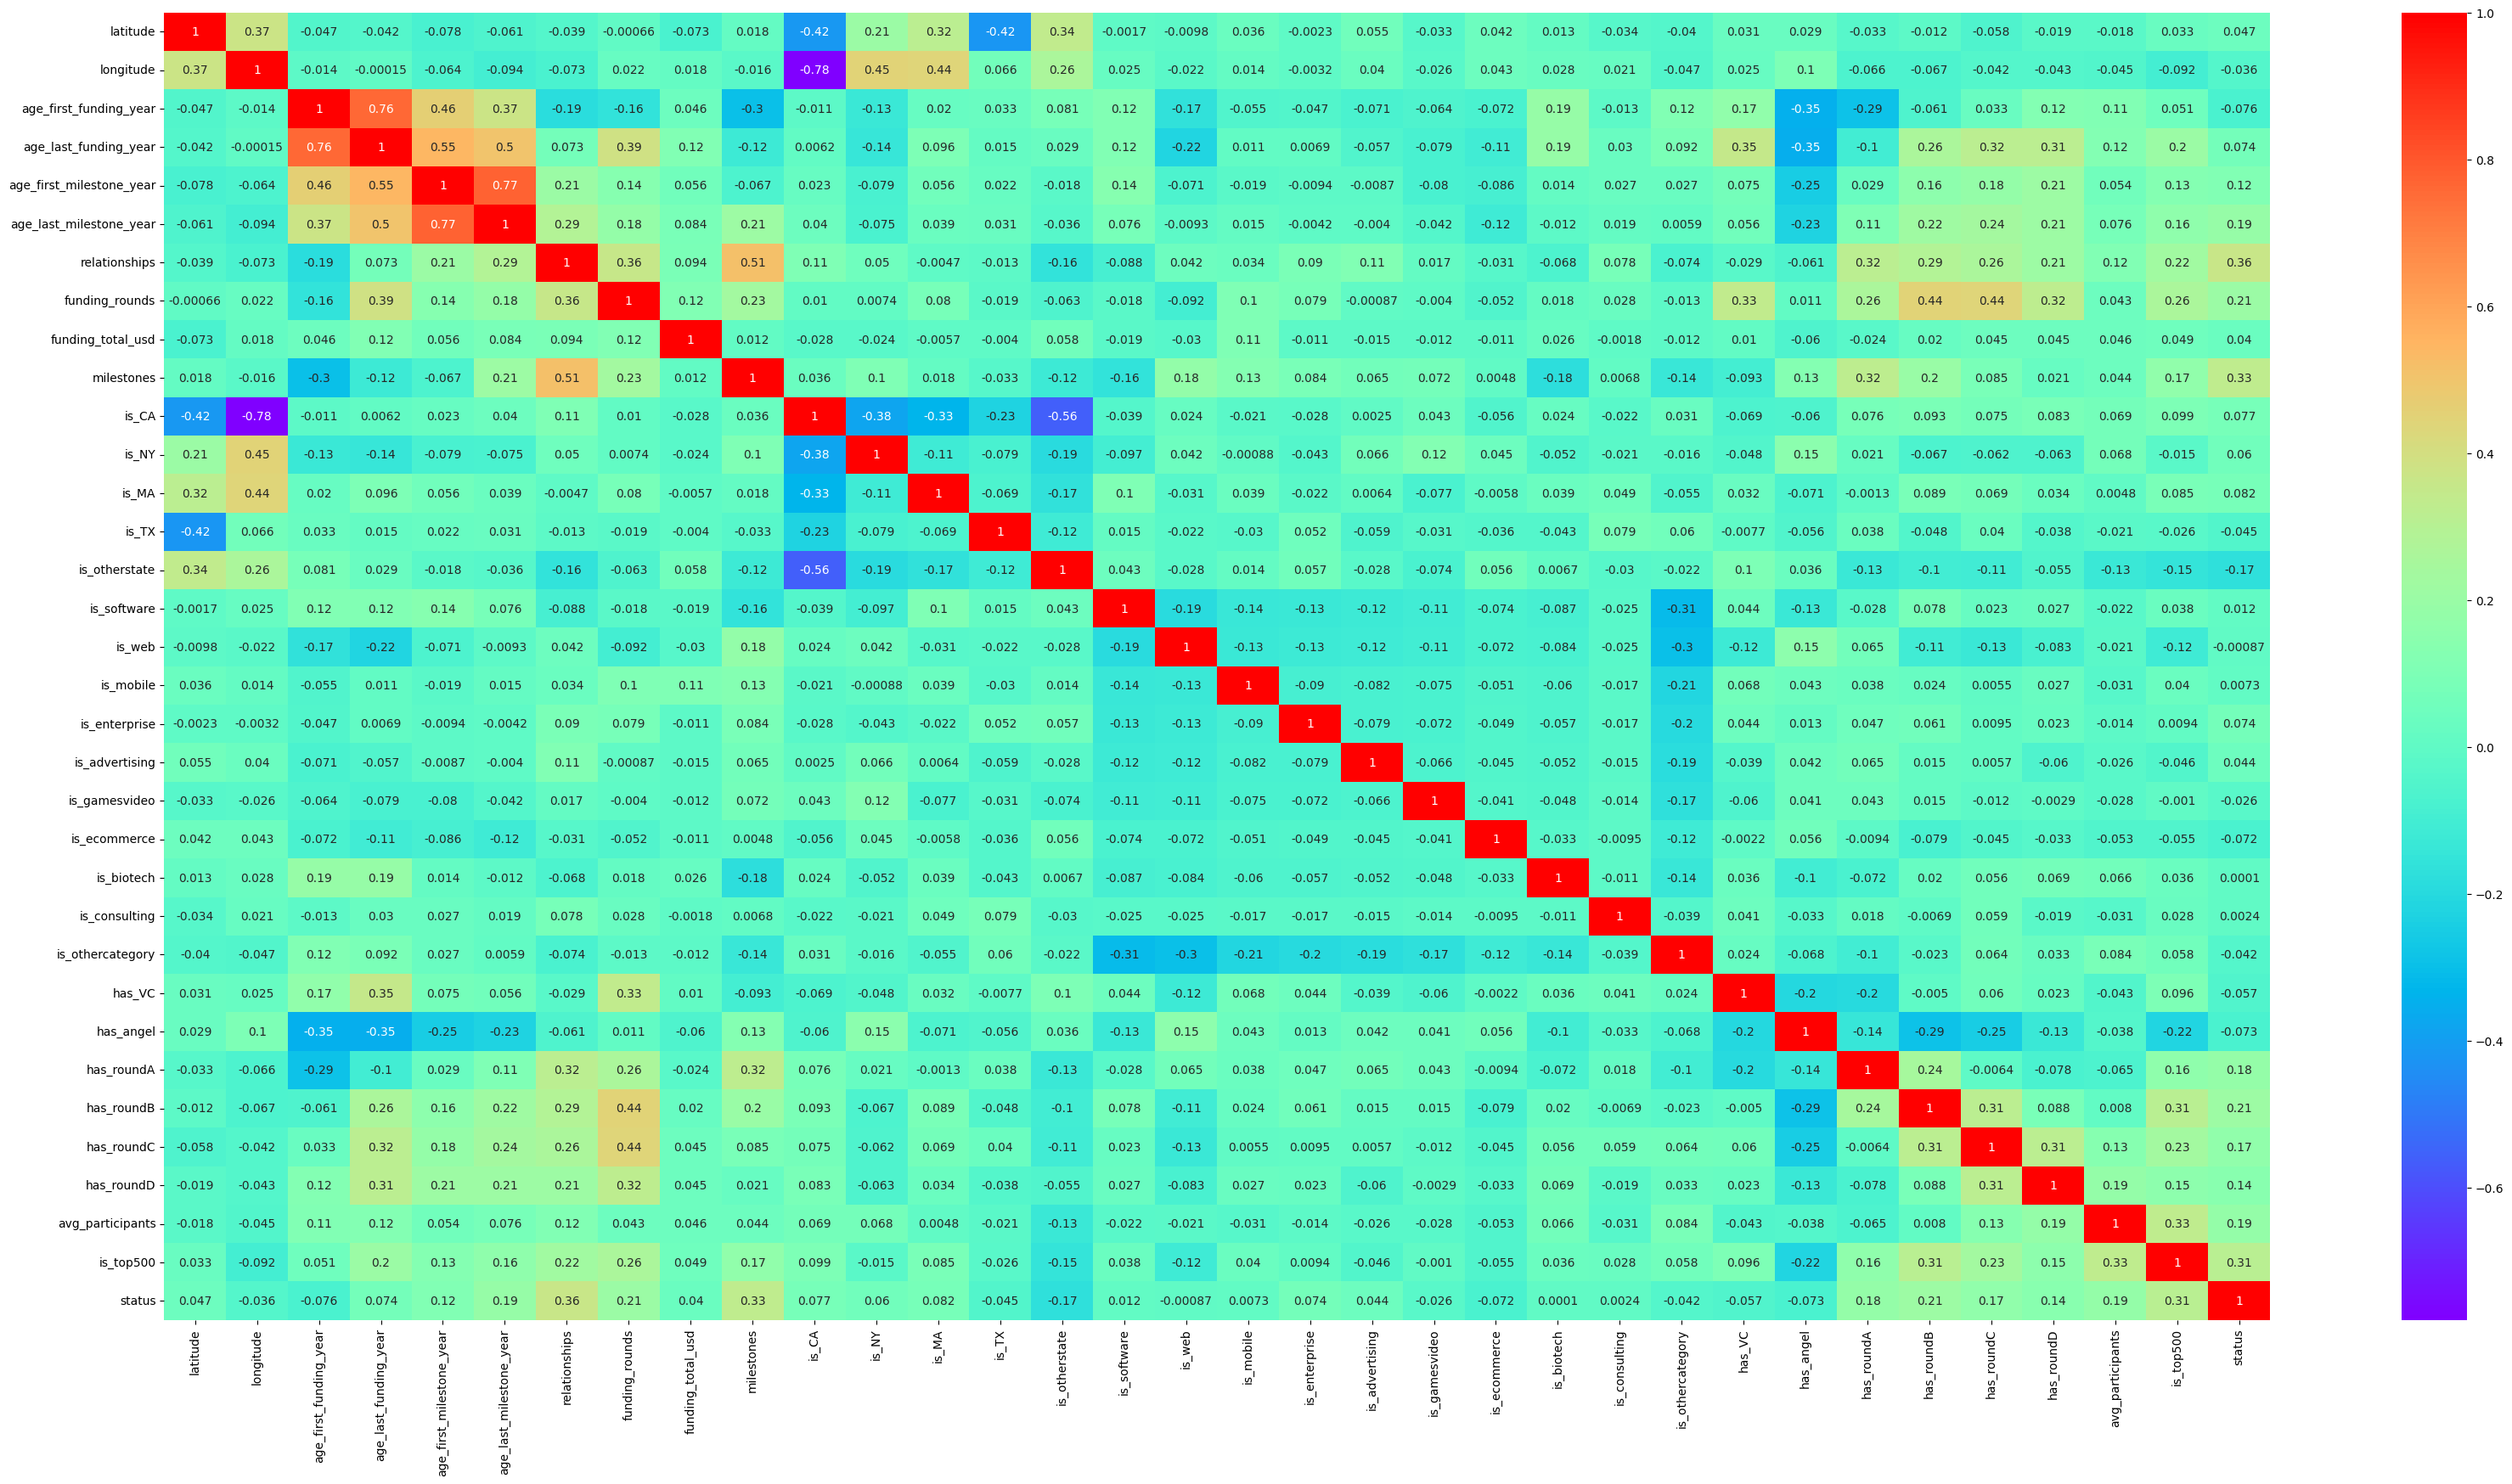

In [25]:
# Visualizing Correlation Matrix
import seaborn as sns

fig, ax = plt.subplots(figsize = (40,20))
corr_matrix = startup.select_dtypes(include=['int64','float64']).corr()
sns.heatmap(corr_matrix, cmap = 'rainbow', annot = True)

In [26]:
#Input data
X = startup[['relationships', 'milestones', 'is_top500', 'has_roundB', 'funding_rounds', 'age_last_milestone_year',
               'avg_participants', 'has_roundA', 'has_roundC', 'has_roundD', 'age_first_milestone_year', 'is_MA', 
               'is_CA', 'is_enterprise', 'age_last_funding_year', 'is_NY', 'latitude', 'is_advertising', 'is_advertising', 
               'funding_total_usd', 'is_software', 'is_mobile', 'is_consulting', 'is_biotech', 'is_biotech', 'is_web',
               'is_gamesvideo', 'longitude', 'is_othercategory', 'is_TX', 'has_VC', 'is_ecommerce', 'has_angel', 
               'age_first_funding_year', 'is_otherstate']]

X.head()

,relationships,milestones,is_top500,has_roundB,funding_rounds,age_last_milestone_year,avg_participants,has_roundA,has_roundC,has_roundD,...,is_web,is_gamesvideo,longitude,is_othercategory,is_TX,has_VC,is_ecommerce,has_angel,age_first_funding_year,is_otherstate
0,3,3,0,0,3,6.7041,1.0000,0,0,0,...,0,0,-71.056820,1,0,0,0,1,2.2493,0
1,9,1,1,1,4,7.0055,4.7500,0,1,1,...,0,0,-121.973718,0,0,1,0,0,5.1260,0
2,5,2,1,0,1,2.2055,4.0000,1,0,0,...,1,0,-117.192656,0,0,0,0,0,1.0329,0
3,5,1,1,1,3,6.0027,3.3333,0,1,1,...,0,0,-122.050040,0,0,0,0,0,3.1315,0
4,2,1,1,0,2,0.0384,1.0000,0,0,0,...,0,1,-122.419236,0,0,1,0,1,0.0000,0


In [27]:
# Output Data
Y = startup['status']
Y.head()

0    1
1    1
2    1
3    1
4    0
Name: status, dtype: int64

Standardization

In [28]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scaled_data = scale.fit_transform(X)

## **Model Evaluation**

In [29]:
# Splitting Input into Training and Testing Data
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(scaled_data, Y, test_size=0.20, random_state=7)

In [30]:
len(X_train)

738

In [31]:
len(X_test)

185

In [32]:
# Comparing different models and their Performance

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import model_selection

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Random Forest Classifier

In [33]:
rf = RandomForestClassifier()
param_grid = {'n_estimators':[100,200,300],
              'max_depth':[10,20,30],
              'min_samples_split':[2,4,6],
              'min_samples_leaf':[1,2,3],
              'bootstrap':[True,False]}

grid_search = GridSearchCV(estimator=rf, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = False)
grid_search.fit(X_train, Y_train)

print('Best parameters:', grid_search.best_params_)

Best parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200}


In [42]:
rf = RandomForestClassifier(n_estimators=200,bootstrap=False,max_depth=20,min_samples_leaf=2, min_samples_split=6)
model_rf = rf.fit(X_train,Y_train)
pred_rf = model_rf.predict(X_test)
cr_rf = classification_report(pred_rf, Y_test)
print(cr_rf)

              precision    recall  f1-score   support

           0       0.51      0.82      0.63        45
           1       0.93      0.74      0.83       140

    accuracy                           0.76       185
   macro avg       0.72      0.78      0.73       185
weighted avg       0.83      0.76      0.78       185



In [44]:
accuracy = accuracy_score(Y_test, pred_rf)
precision = precision_score(Y_test, pred_rf)
recall = recall_score(Y_test, pred_rf)
f1 = f1_score(Y_test, pred_rf)

print('Random_Forest_Classifier Accuracy: %f' % accuracy)
print('Random_Forest_Classifier: %f' % precision)
print('Random_Forest_Classifier Recall: %f' % recall)
print('Random_Forest_Classifier F1-Score: %f' % f1)

Random_Forest_Classifier Accuracy: 0.762162
Random_Forest_Classifier: 0.742857
Random_Forest_Classifier Recall: 0.928571
Random_Forest_Classifier F1-Score: 0.825397


Logistic Regression

In [36]:
lr = LogisticRegression()

lr.fit(X_train, Y_train)
pred_lr = lr.predict(X_test)

In [41]:
cr_lr= classification_report(pred_lr, Y_test)
print(cr_lr)

              precision    recall  f1-score   support

           0       0.56      0.69      0.62        59
           1       0.84      0.75      0.79       126

    accuracy                           0.73       185
   macro avg       0.70      0.72      0.71       185
weighted avg       0.75      0.73      0.74       185



In [40]:
accuracy = accuracy_score(Y_test, pred_lr)
precision = precision_score(Y_test, pred_lr)
recall = recall_score(Y_test, pred_lr)
f1 = f1_score(Y_test, pred_lr)

print('LogisticRegression Accuracy: %f' % accuracy)
print('LogisticRegression Precision: %f' % precision)
print('LogisticRegression Recall: %f' % recall)
print('LogisticRegression F1-Score: %f' % f1)

LogisticRegression Accuracy: 0.729730
LogisticRegression Precision: 0.746032
LogisticRegression Recall: 0.839286
LogisticRegression F1-Score: 0.789916


Decision Tree

In [46]:
# Decision Tree Classifier Model
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train) #fitting the model
pred_dt = dt.predict(X_test) #predicting the model

# Generating Classification Report 
cr_dt= classification_report(pred_dt, Y_test)
print(cr_dt)

              precision    recall  f1-score   support

           0       0.56      0.59      0.58        69
           1       0.75      0.72      0.74       116

    accuracy                           0.68       185
   macro avg       0.66      0.66      0.66       185
weighted avg       0.68      0.68      0.68       185



In [48]:
accuracy = accuracy_score(Y_test, pred_dt)
precision = precision_score(Y_test, pred_dt)
recall = recall_score(Y_test, pred_dt)
f1 = f1_score(Y_test, pred_dt)

print('Decision Tree Accuracy: %f' % accuracy)
print('Decision Tree Precision: %f' % precision)
print('Decision Tree Recall: %f' % recall)
print('Decision Tree F1-Score: %f' % f1)

Decision Tree Accuracy: 0.675676
Decision Tree Precision: 0.724138
Decision Tree Recall: 0.750000
Decision Tree F1-Score: 0.736842


Gradient Boosting

In [49]:
# Gradient Boosting Classifier Model
gb = GradientBoostingClassifier()
gb.fit(X_train, Y_train) #fitting the model
pred_gb = gb.predict(X_test) #predicting the model

# Generating Classification Report 
cr_gb= classification_report(pred_gb, Y_test)
print(cr_gb)

              precision    recall  f1-score   support

           0       0.53      0.81      0.64        48
           1       0.92      0.75      0.83       137

    accuracy                           0.77       185
   macro avg       0.73      0.78      0.74       185
weighted avg       0.82      0.77      0.78       185



In [51]:
accuracy = accuracy_score(Y_test, pred_gb)
precision = precision_score(Y_test, pred_gb)
recall = recall_score(Y_test, pred_gb)
f1 = f1_score(Y_test, pred_gb)

print('Gradient Boosting Accuracy: %f' % accuracy)
print('Gradient Boosting Precision: %f' % precision)
print('Gradient Boosting Recall: %f' % recall)
print('Gradient Boosting F1-Score: %f' % f1)

Gradient Boosting Accuracy: 0.767568
Gradient Boosting Precision: 0.751825
Gradient Boosting Recall: 0.919643
Gradient Boosting F1-Score: 0.827309


*From above comparison of models we can observe that Gradient Boosting and Random Forest Classifier are having higher accuracy comparatively.*